In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pandas as pd
from tqdm import tqdm
import numpy as np

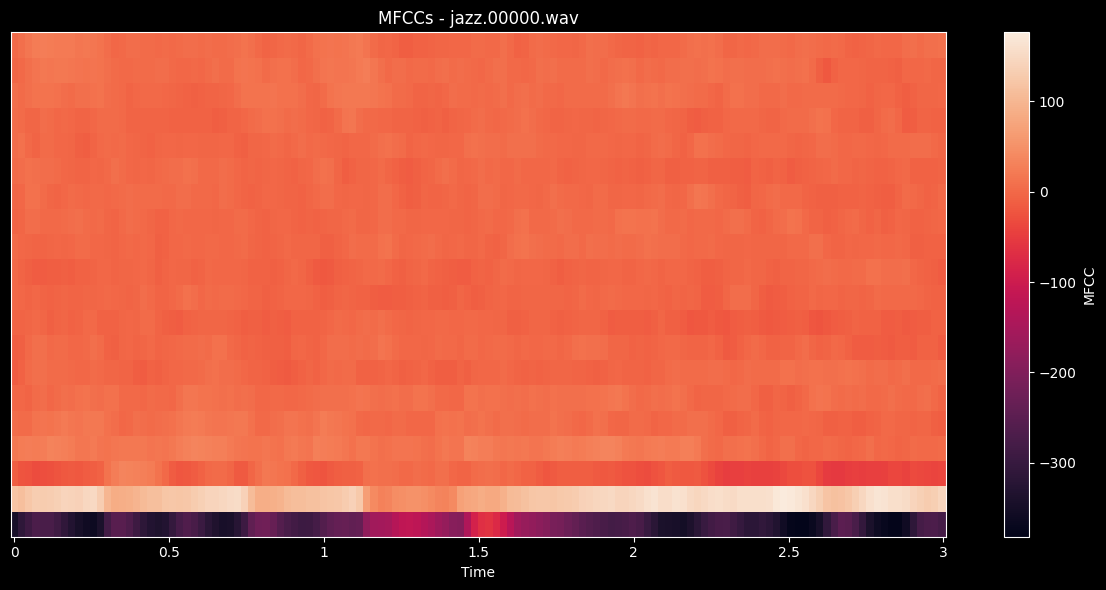

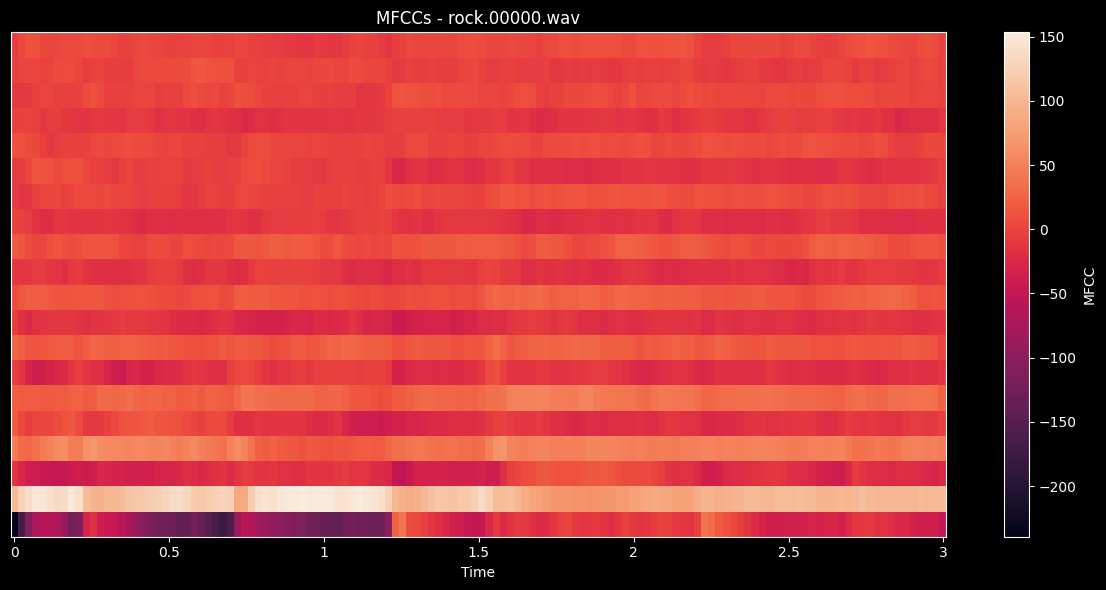

In [2]:
audio_files = ['data/genres_original/jazz/jazz.00000.wav', 
               'data/genres_original/rock/rock.00000.wav']
plt.style.use('dark_background')
for i, audio_file in enumerate(audio_files, 1):
    plt.figure(figsize=(12, 6))
    y, sr = librosa.load(audio_file, sr=None, duration=3)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
    
    librosa.display.specshow(mfcc, x_axis='time', sr=sr, cmap="rocket")
    plt.colorbar(label='MFCC')
    plt.title(f'MFCCs - {audio_file.split("/")[-1]}')
    
    plt.tight_layout()
    plt.show()

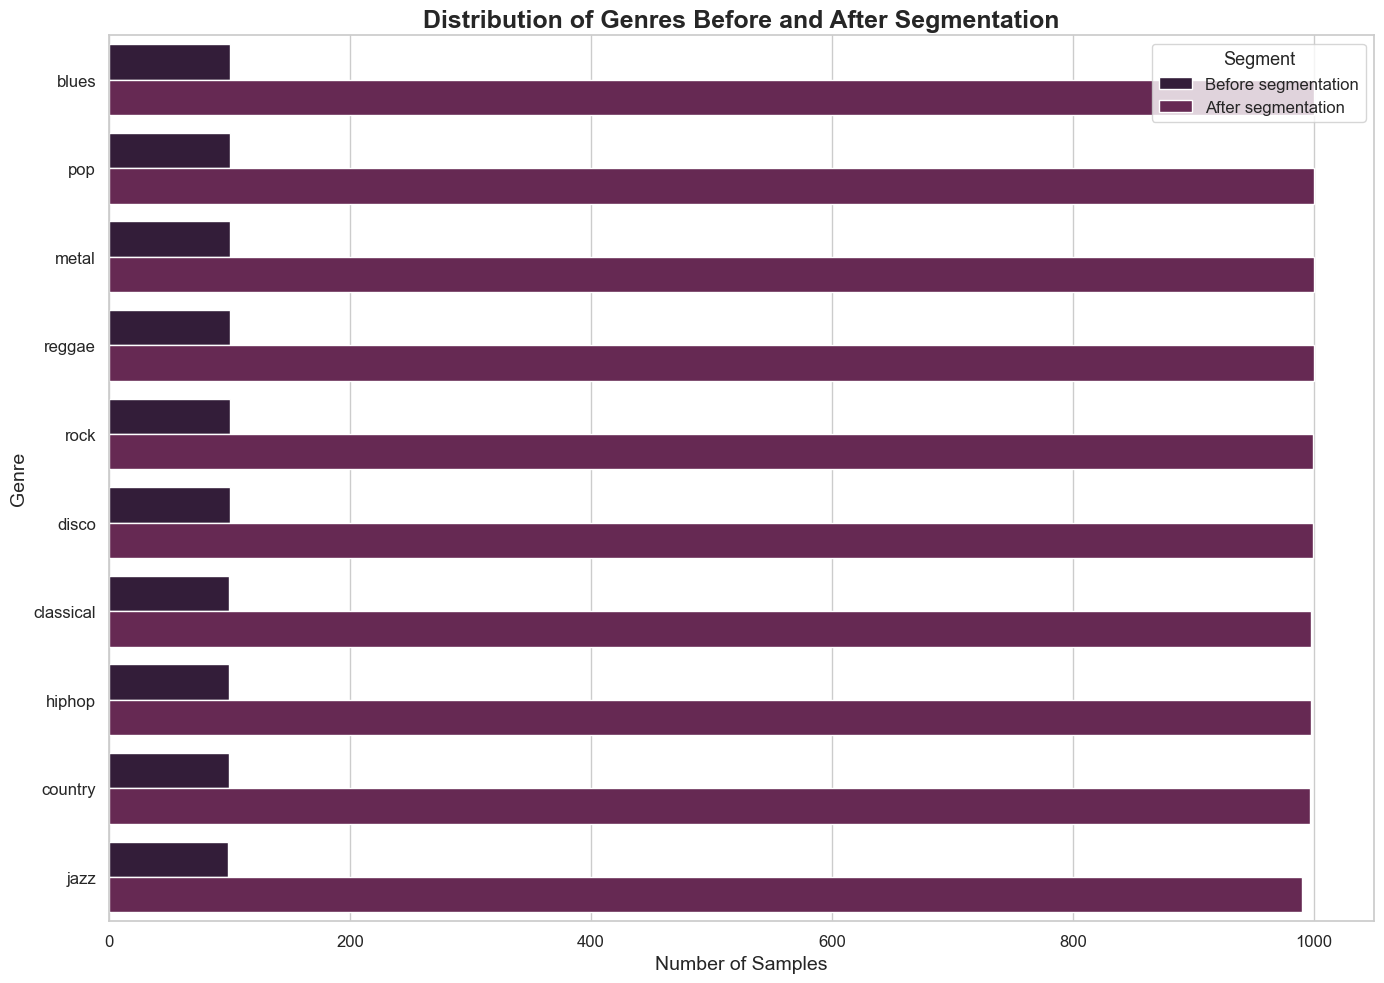

In [3]:
sns.set(style="whitegrid", palette="rocket")

data = pd.read_csv("features_gtzan.csv")

genre_counts = data['genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

genre_counts_before_segmented = genre_counts.copy()
genre_counts_before_segmented['Count'] = genre_counts_before_segmented['Count'] / 10
genre_counts_before_segmented['Segment'] = 'Before segmentation'

genre_counts['Segment'] = 'After segmentation'

combined_counts = pd.concat([genre_counts_before_segmented, genre_counts])

plt.figure(figsize=(14, 10))
sns.barplot(x='Count', y='Genre', hue='Segment', data=combined_counts, dodge=True)

plt.title('Distribution of Genres Before and After Segmentation', fontsize=18, weight='bold')
plt.xlabel('Number of Samples', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Segment', title_fontsize='13', fontsize='12', loc='upper right')

plt.tight_layout()

plt.show()